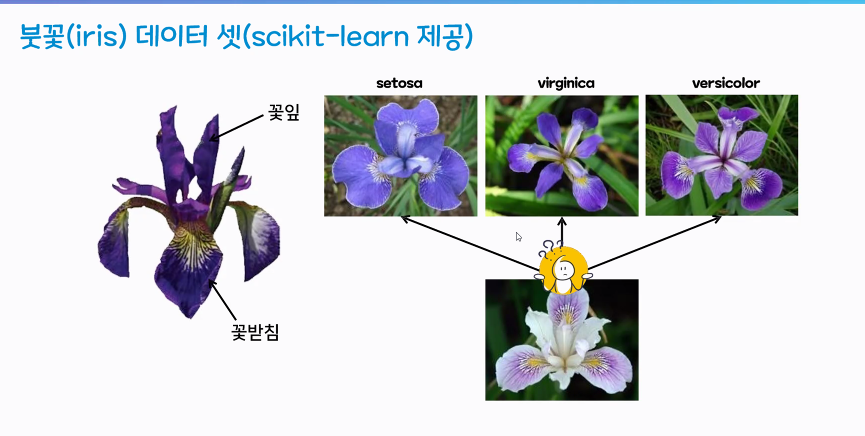

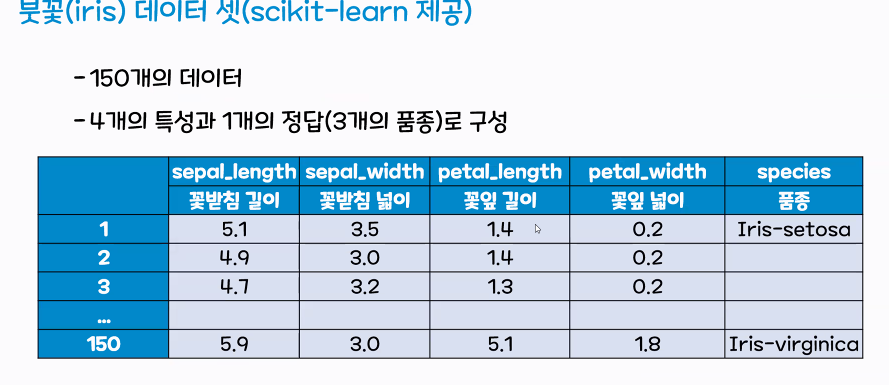

### 목표 설정
- 최 근접 이웃 알고리즘을 이용해서 붓꽃 품종을 분류해보자
- 하이퍼 파라미터를 수정해서 성능이 어떻게 바뀌는지 살펴보자.

### 데이터 확보

In [1]:
# 사이킷 런에서 제공하는 붓꽃 품종 데이터를 불러오자
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

In [3]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
# 아이리스 데이터에 key값을 살펴보자
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
# 데이터에 대한 해석 - 
# data(필수 데이터) : 독립변수 , 문제 데이터(X), ndarray 형태
# target(필수 데이터) : 종속변수, 정답 데이터(y), ndarray 형태
# feature_names  (옵션 데이터) : 특징의 이름, list 형태
# target_names(옵션 데이터) : 정답 데이터의 이름 / 붓꽃의  품종, ndarray 형태
# DESCR : readme.txt와 같은 존재 / 데이터에 대한 설명서

In [7]:
# DESCR 읽어보기
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [8]:
# 문제 데이터 확인하기
iris['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [9]:
# 정답 데이터 확인
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
# target_names 확인해보기
# 0 - setosa / 1- versicolor / 2 - verginica

iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [12]:
# feature_names 확인해보기
iris['feature_names']
#'sepal length (cm)', : 꽃받침 길이
#'sepal width (cm)', : 꽃받침 너비(폭)
#'petal length (cm)', : 꽃잎의 길이
#'petal width (cm)' : 꽃잎의 너비(폭)

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

### 데이터 셋 구성하기
- 문제와 답을 분리
- 훈련과 테스트 셋트를 분리

In [20]:
# 문제와 답 분리
X = iris['data']
y = iris['target']

# 분리한 데이터 확인

In [25]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [28]:
# 가독성을 위해서 데이터 프레임으로 만들어주자
import pandas as pd

iris_df = pd.DataFrame(X, columns=iris['feature_names'])
iris_df

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]

In [32]:
# 훈련셋(train) / 평가셋(test) 분리 
# 훈련과 평가에 비율은 7 : 3
# ioc iloc 사용 못함 데이터 쏠림현상이 생기기 때문

In [34]:
# 사이킷 런에서 데이터를 분할하는 도구를 살펴보자
# train_test_split()
from sklearn.model_selection import train_test_split

In [48]:
# 데이터 분할 시작
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, # 기본값 0.25
                                                   randomseed=) # 랜덤시드 고정값  값을 바꾸면 bincount가 달라짐


In [39]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


In [49]:
import numpy as np
np.bincount(y_train)

array([34, 37, 34], dtype=int64)

### 탐색적 데이터 분석(EDA)

array([[<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal width (c

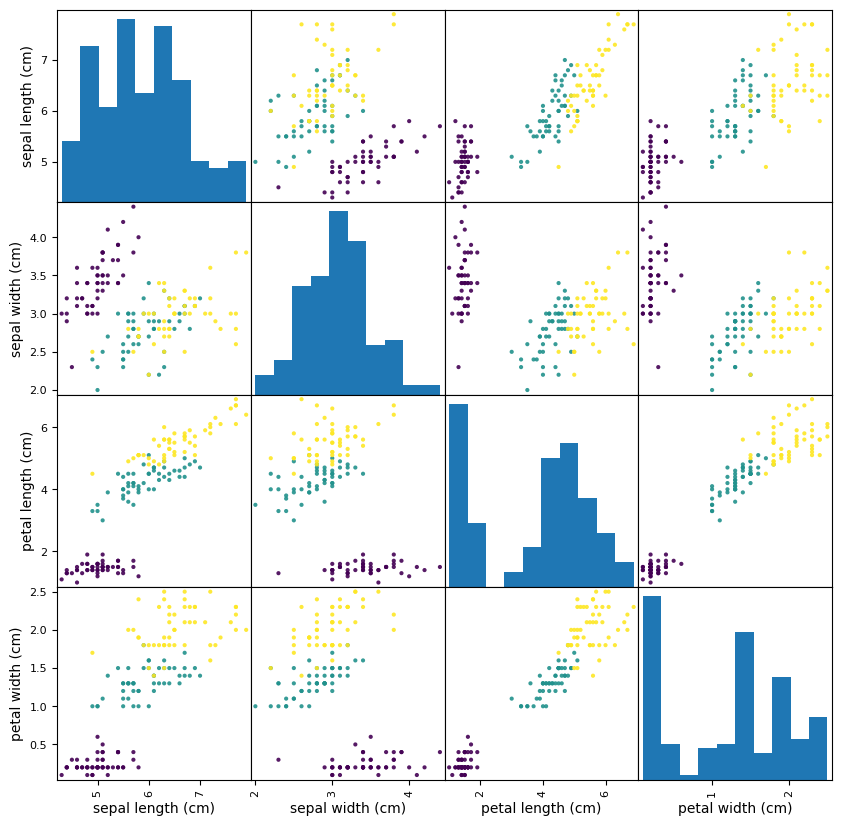

In [54]:
# 산점도 행렬 : 한꺼번에 변수간의 관계를 일목요연하게 보여주는 그래프 행렬
pd.plotting.scatter_matrix(iris_df, # 데이터
                          figsize=(10,10), # 그래프의 사이즈
                           c = y,  # 색상
                           alpha = 0.9 # 투명도
                          )                                                                    

### 모델링
- knn 최근접 이웃 알고리즘 사용

In [57]:
# 모델 import
from sklearn.neighbors import KNeighborsClassifier
# 사이킷 런에 있는 이웃을 보는 알고리즘이 모여있는 곳에 가서 knn 분류모델 import 한다
# KNneiborsClassifier : knn 분류 모델
# KNeighborRegressor : knn 회귀 모델

In [61]:
# 모델 객체 생성
knn_model = KNeighborsClassifier() # 기본 모델

In [62]:
# 모델 학습
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [66]:
# 예측 단계
pre = knn_model.predict(X_test)
pre

C:\Users\smhrd\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([0, 1, 2, 1, 1, 1, 0, 0, 2, 0, 0, 2, 2, 1, 2, 1, 2, 1, 1, 0, 1, 2,
       0, 2, 2, 2, 2, 1, 2, 1, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 1, 0, 2, 0,
       0])

In [68]:
# 예측한 값의 실제 품종을 보여주세요!
print(f"예상되는 품종은 : \n {iris['target_names'][pre]}")

예상되는 품종은 : 
 ['setosa' 'versicolor' 'virginica' 'versicolor' 'versicolor' 'versicolor'
 'setosa' 'setosa' 'virginica' 'setosa' 'setosa' 'virginica' 'virginica'
 'versicolor' 'virginica' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'setosa' 'versicolor' 'virginica' 'setosa' 'virginica'
 'virginica' 'virginica' 'virginica' 'versicolor' 'virginica' 'versicolor'
 'setosa' 'setosa' 'setosa' 'setosa' 'virginica' 'virginica' 'virginica'
 'setosa' 'setosa' 'virginica' 'versicolor' 'setosa' 'virginica' 'setosa'
 'setosa']


In [100]:
from sklearn.metrics import accuracy_score 

In [101]:
accuracy_score(y_test, pre)

0.9777777777777777

### 하이퍼 파라미터를 조정
- KNN에서는 이웃의 수(n_neighbors) 를 의미함
- 하이퍼 파라미터를 조정해서 일반화 성능이 뛰어난 모델을 찾아보자

In [102]:
# 데이터를 담을 두개의 빈 리스트 생성
train_list = []
test_list = []

# 이웃의 수를 조정해 줄 숫자들을 생성
neighbors_setting = range(1,51)

# 반복문 작성
for k in neighbors_setting :
    # 모델 생성
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    # 모델 학습
    knn_clf.fit(X_train, y_train)
    
    # train 셋 정확도 저장
    train_pre = knn_clf.predict(X_train) # 예측 진행
    train_score = accuracy_score(train_pre, y_train) # 훈련셋 정확도 측정
    train_list.append(train_score)
    
    # test 셋 정확도 저장
    test_pre = knn_clf.predict(X_test)
    test_score = accuracy_score(test_pre, y_test)
    test_list.append(test_score)

C:\Users\smhrd\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\smhrd\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\smhrd\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\smhrd\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [104]:
from matplotlib import pyplot as plt

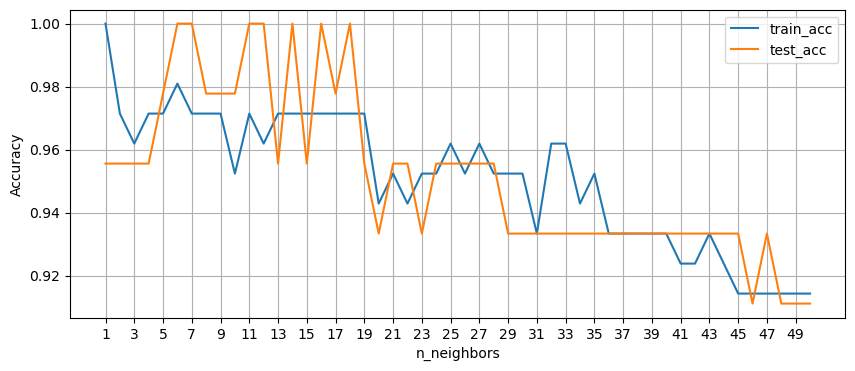

In [103]:
plt.figure(figsize=(10,4))
plt.plot(range(1,51), train_list, label='train_acc')
plt.plot(range(1,51), test_list, label='test_acc')
plt.grid()
plt.xticks(range(1,51,2))
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()
plt.show()

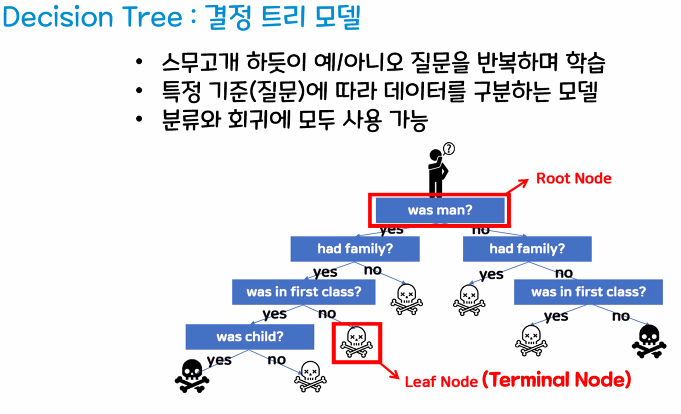
앙상블 

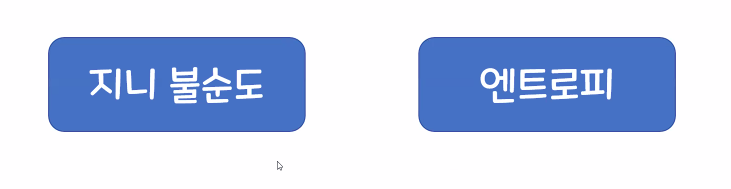

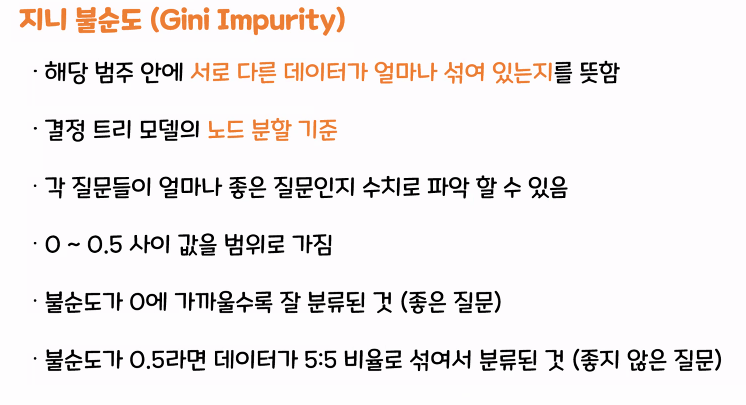

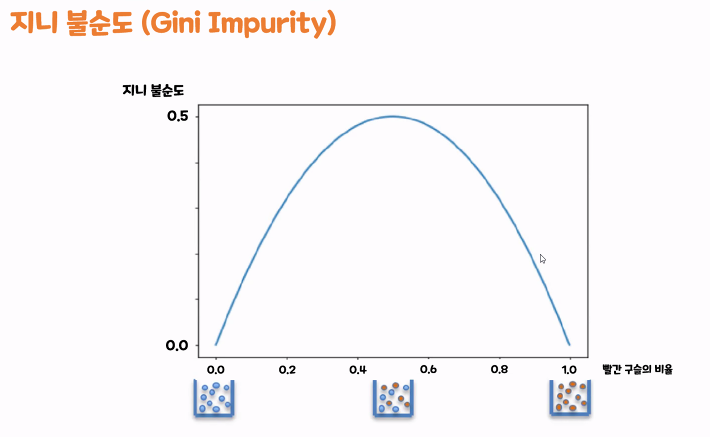

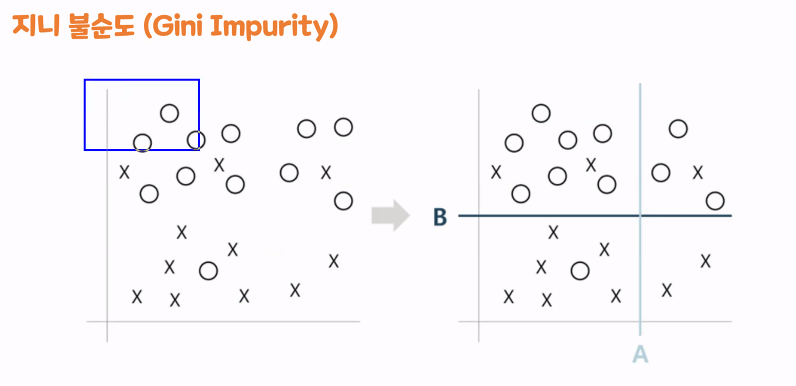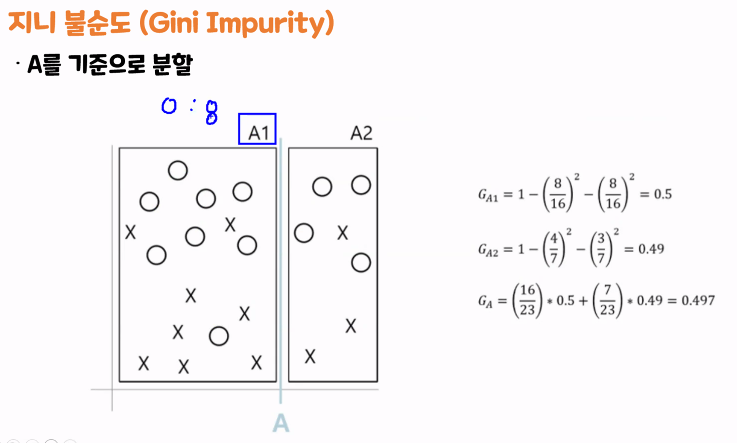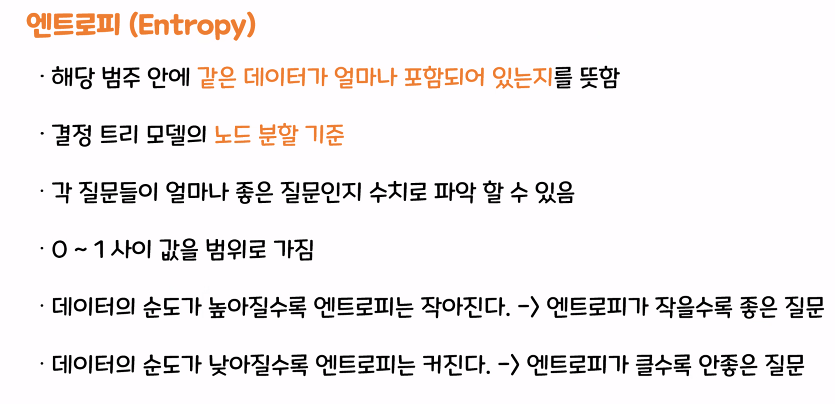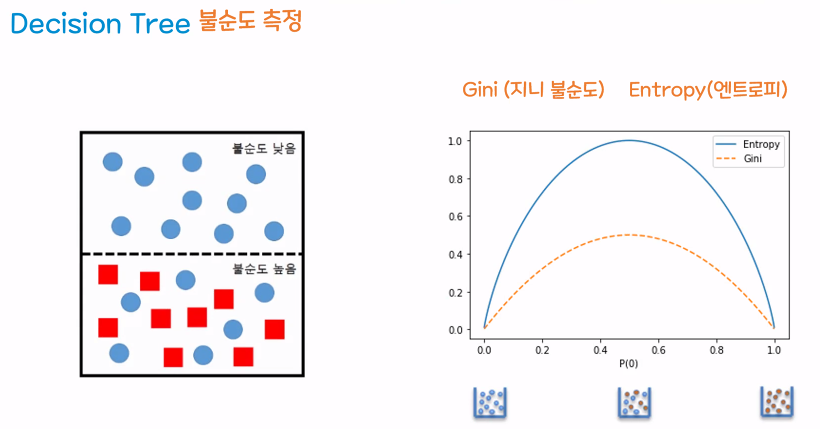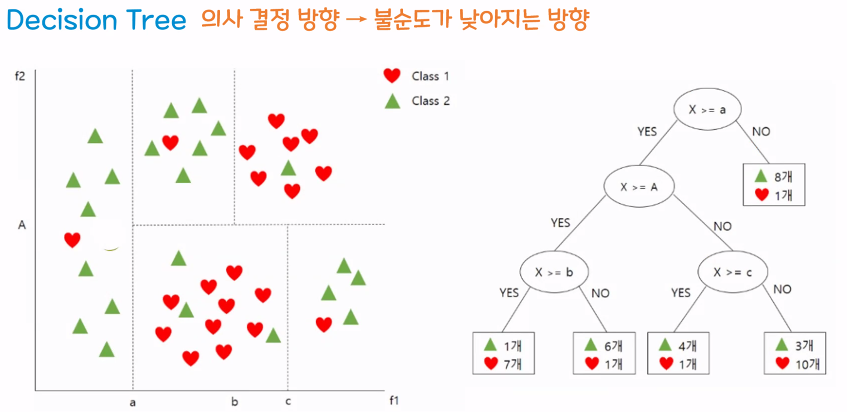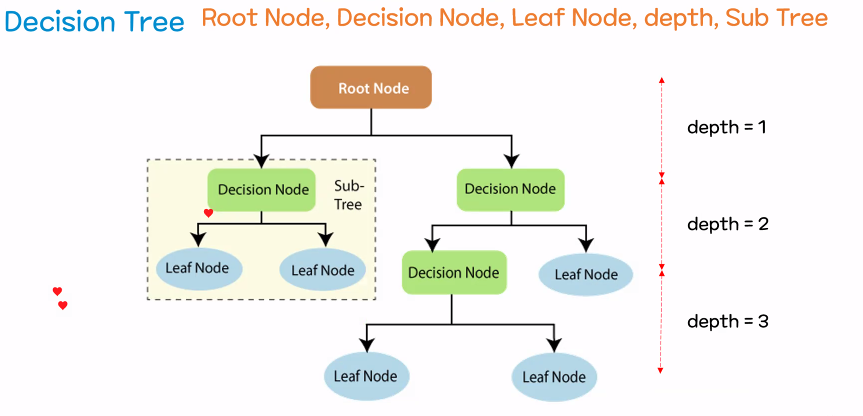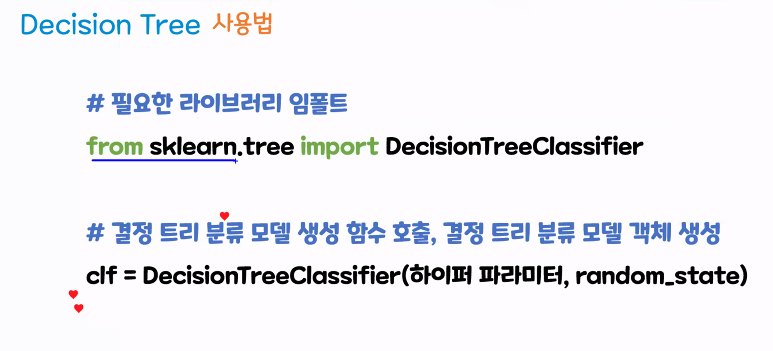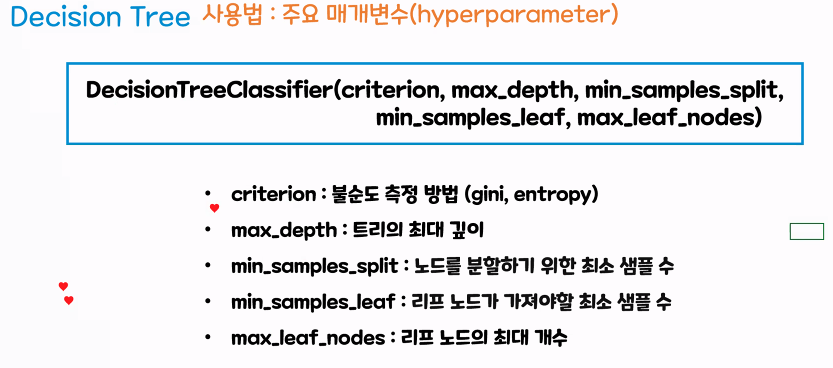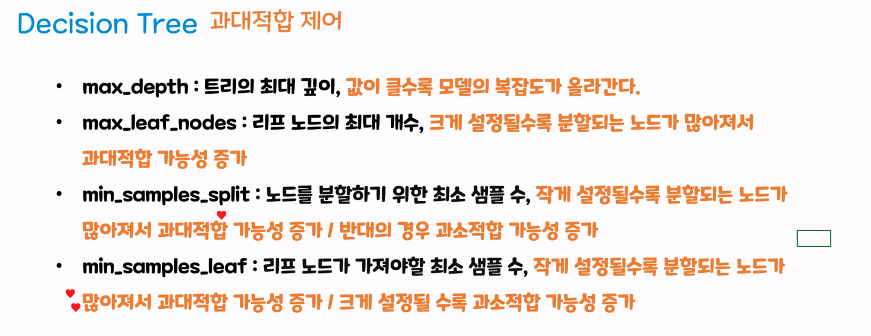

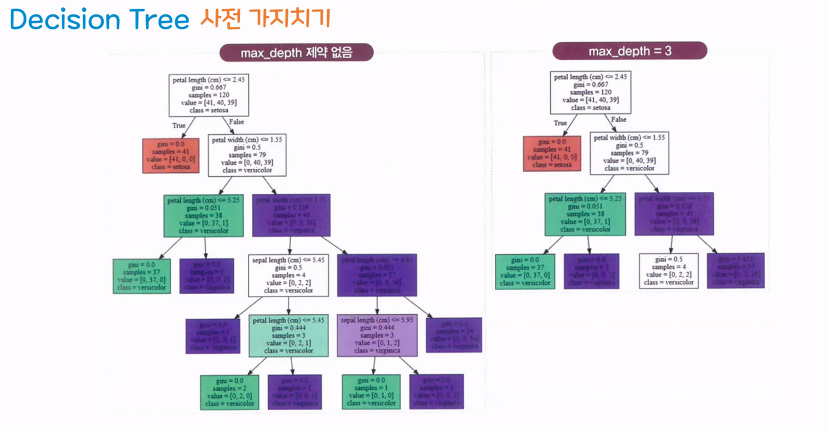

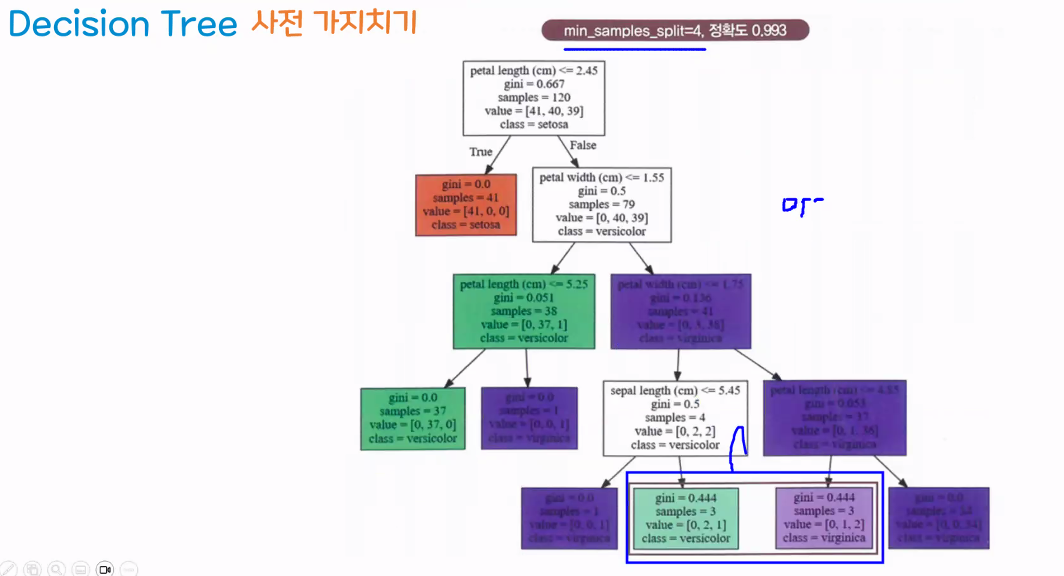

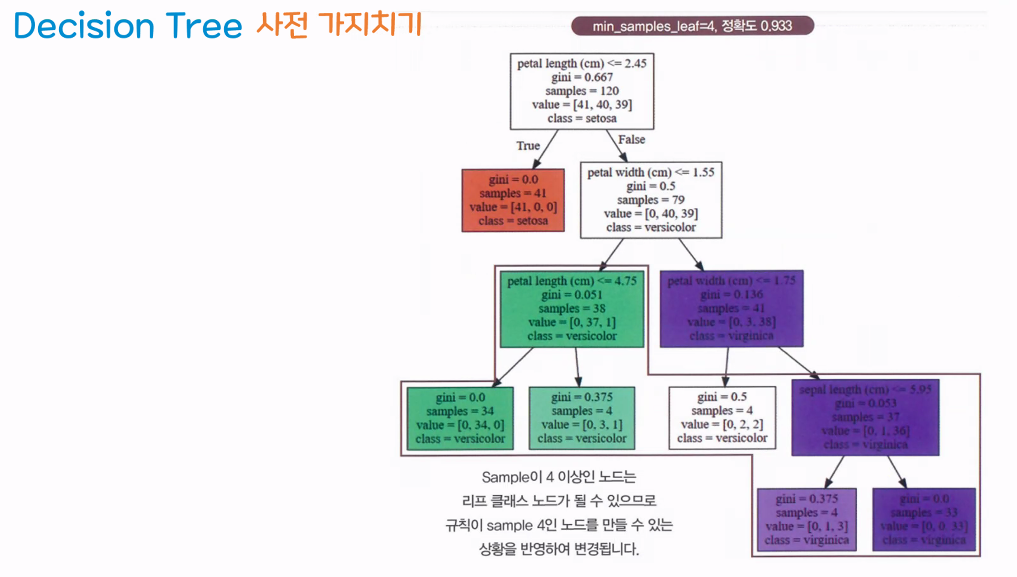

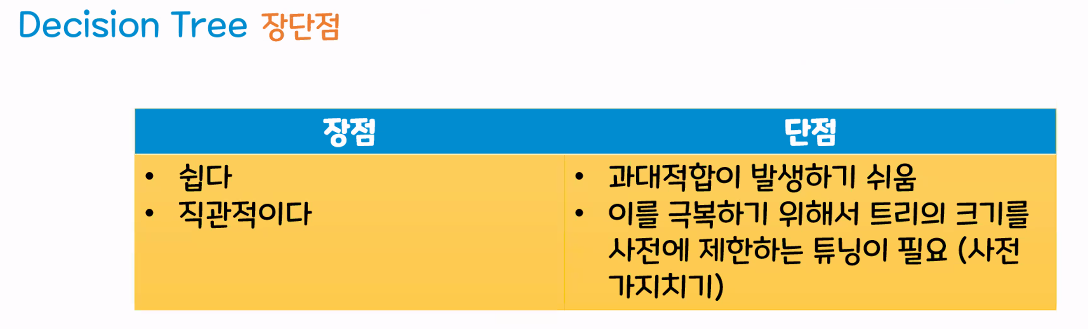

정확한 예측이 어렵다